# Classification of Cancer Cells using Support Vector Machine by `Mr. Harshit Dawar`!

## Importing the Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm

In [3]:
# Downloading the dataset
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2020-05-22 15:45:35--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  20.19K  --.-KB/s    in 0.001s  

2020-05-22 15:45:37 (25.4 MB/s) - ‘cell_samples.csv’ saved [20675/20675]



In [5]:
# Loading the data
data = pd.read_csv("cell_samples.csv")

In [6]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [57]:
# Checking the data types of the data
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [34]:
# Checking the unique values of the classes
data["Class"].unique()

array([2, 4])

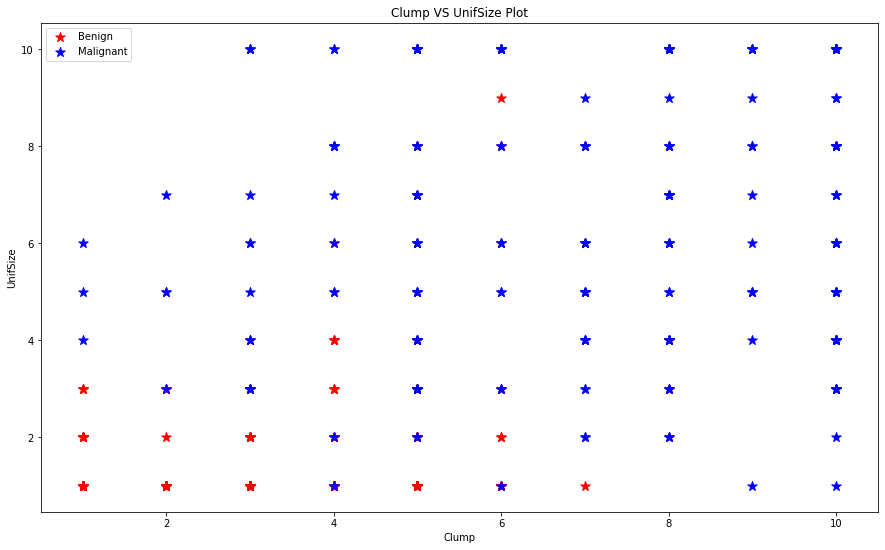

In [48]:
fig, ax = plt.subplots(figsize = (15,9))
ax.scatter(
    data[data["Class"] == 2]["Clump"],
           data[data["Class"] == 2]["UnifSize"],
           c = "RED",
           s = 100,
           marker = "*",
           label = "Benign"
          )

ax.scatter(
    data[data["Class"] == 4]["Clump"],
           data[data["Class"] == 4]["UnifSize"],
           c = "Blue",
           s = 100,
           marker = "*",
           label = "Malignant"
          )

ax.set(
    xlabel = "Clump",
       ylabel = "UnifSize",
       title = "Clump VS UnifSize Plot"
)

ax.legend()

plt.show()

In [58]:
# Checking Null Values in the Data
data.isna().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [59]:
# Checking the unique values of BareNuc
data["BareNuc"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [65]:
# Replacing the "?" in BareNuc 
for i in range(len(data)):
    if data["BareNuc"][i] == "?":
        data["BareNuc"][i] = 0

In [66]:
# Checking the unique values of BareNuc Again
data["BareNuc"].unique()

array(['1', '10', '2', '4', '3', '9', '7', 0, '5', '8', '6'], dtype=object)

In [68]:
# Converting categorical to Numerical Form
data["BareNuc"] = pd.to_numeric(data["BareNuc"], errors = "coerce").astype(int)

In [69]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [70]:
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object